In [14]:
import csv
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np



In [15]:
dataset_dir = Path("dataset")
labels_csv_path = dataset_dir / "labels.csv"

images = list(dataset_dir.glob("*.png"))

In [16]:
labels: dict[str, str] = {}
with open(labels_csv_path, "r") as f:
    reader = csv.reader(f)
    headers = next(reader)
    for row in reader:
        labels[row[0]] = row[1]

assert len(images) == len(labels)

In [22]:
grid_dim = 4

np.random.seed(41)
random_image_inds = np.random.choice(len(images), grid_dim ** 2, replace=False)

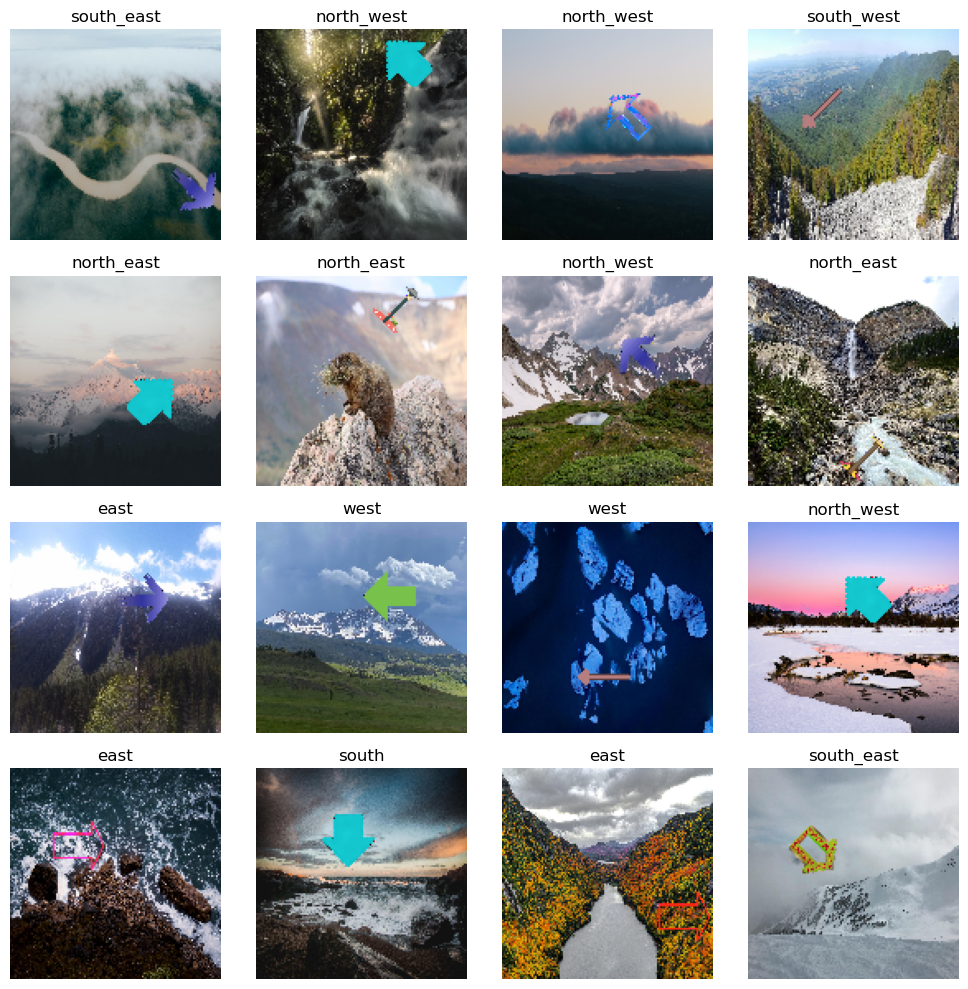

In [25]:
fig, axs = plt.subplots(grid_dim, grid_dim, figsize=(10, 10))

for i, ax in enumerate(axs.flat):
    image_path = images[random_image_inds[i]]
    image = plt.imread(image_path)
    ax.imshow(image)
    ax.set_title(labels[image_path.stem])
    ax.axis("off")
    
fig.tight_layout()
fig.savefig("sample.png", dpi=300)